# Linear Regression

This notebook explores an analytical solution to the linear regression problem with one feature and one dependent variable.

In [13]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

In [14]:
housing = fetch_california_housing()
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
m = 200  # Number of points to use

income = housing.data[:m, 0]
price = housing.target[:m]

Use normal equations for linear regression problem. We're looking for the value of vector $\theta \in \R^{n+1}$ that minimizes the cost function $J(\theta)$. $n$ is the number of features.

Define $X$ and $y$:
$$
X = \begin{bmatrix} 
-(x^{(1)})^T- \\
-(x^{(2)})^T- \\
\vdots \\
-(x^{(m)})^T-
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix}
$$

Then $\theta$ can be found as such:
$$
\theta = (X^T X)^{-1} X^Ty
$$

In [16]:
X = np.ones((m, 2))
X[:, 1] = income

y = np.array(price)

theta = np.linalg.inv(X.T @ X) @ X.T @ y
assert(len(theta.shape) == 1)
assert(theta.shape[0] == 2)

In [17]:
def prediction(x):
	return theta[0] + theta[1] * x

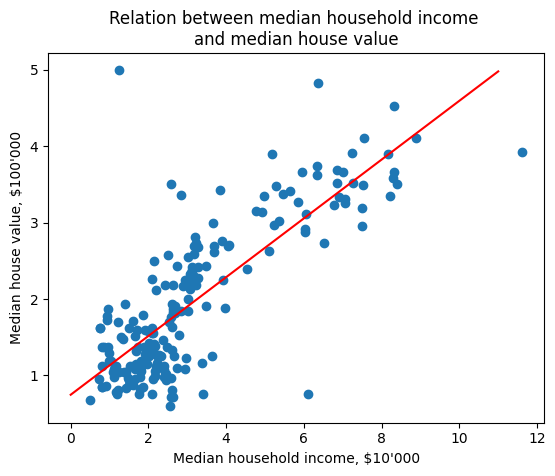

In [18]:
x_vals = np.arange(np.max(income))
y_vals = prediction(x_vals)

plt.scatter(income, price)
plt.xlabel("Median household income, $10'000")
plt.ylabel("Median house value, $100'000")
plt.title("Relation between median household income \nand median house value")
plt.plot(x_vals, y_vals, 'r')

plt.show()